# Importing the data

In [1]:
# Some nice libraries to treat the data
import numpy as np
import pandas as pd

In [2]:
# Create the test and the train data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

test.head()
train.head()

print("Test", test.shape, "Train", train.shape)

Test (479, 19) Train (480, 19)


# Data Wrangling

In [3]:
train = train.replace("--", np.nan)
test = test.replace("--", np.nan)

print("Rows\t: ", train.shape[0])
print("Columns\t: ", train.shape[1])
print("\nFeatures\t: \n", train.columns.tolist())
print("\nMissing values\t: \n", train.isnull().sum().values.sum())
print("\nUnique values\t: \n", train.nunique())
#print(train)

Rows	:  480
Columns	:  19

Features	: 
 ['id', 'categoria', 'cep', 'municipio', 'ano', 'mes', 'dia', 'hora', 'corretor', 'preco', 'area', 'iptu', 'quartos', 'banheiros', 'vagas', 'condopreco', 'condofechado', 'politica', 'link']

Missing values	: 
 907

Unique values	: 
 id              480
categoria         2
cep             134
municipio        11
ano               4
mes              12
dia              31
hora            387
corretor         55
preco           356
area             49
iptu              9
quartos           6
banheiros         6
vagas             6
condopreco       25
condofechado      2
politica          1
link            480
dtype: int64


In [4]:
# Get a summary of all features in the data and their types
train.info()

# Remove duplicates from training data
#train.duplicated(subset=None, keep="first")
train.drop_duplicates(inplace=True)

print("Test", test.shape, "Train", train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            480 non-null    int64 
 1   categoria     480 non-null    object
 2   cep           480 non-null    int64 
 3   municipio     480 non-null    object
 4   ano           480 non-null    int64 
 5   mes           480 non-null    int64 
 6   dia           480 non-null    int64 
 7   hora          480 non-null    object
 8   corretor      480 non-null    object
 9   preco         480 non-null    int64 
 10  area          480 non-null    int64 
 11  iptu          18 non-null     object
 12  quartos       480 non-null    int64 
 13  banheiros     478 non-null    object
 14  vagas         478 non-null    object
 15  condopreco    39 non-null     object
 16  condofechado  480 non-null    object
 17  politica      480 non-null    object
 18  link          480 non-null    object
dtypes: int64

In [5]:
# Drop features

train.drop(columns=["link", "hora", "dia", "iptu", "condopreco", "banheiros", "vagas"], inplace=True)
test.drop(columns=["link", "hora", "dia", "iptu", "condopreco", "banheiros", "vagas"], inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            480 non-null    int64 
 1   categoria     480 non-null    object
 2   cep           480 non-null    int64 
 3   municipio     480 non-null    object
 4   ano           480 non-null    int64 
 5   mes           480 non-null    int64 
 6   corretor      480 non-null    object
 7   preco         480 non-null    int64 
 8   area          480 non-null    int64 
 9   quartos       480 non-null    int64 
 10  condofechado  480 non-null    object
 11  politica      480 non-null    object
dtypes: int64(7), object(5)
memory usage: 48.8+ KB


In [6]:
# Check for missing values in the training data

pd.options.display.min_rows = 115
train.isnull().sum().sort_values(ascending=False)

id              0
categoria       0
cep             0
municipio       0
ano             0
mes             0
corretor        0
preco           0
area            0
quartos         0
condofechado    0
politica        0
dtype: int64

In [7]:
# Geting info on the missing datas

missing = [
    #"vagas",
    #"banheiros"
]

train[missing].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Empty DataFrame

In [8]:
# Fixing the missing values. I must discart the iptu and condopreco

values = {
    #"vagas": 0,
    #"banheiros": 0
}

#train.quartos = train.quartos.astype(str)
#test.quartos = test.quartos.astype(str)

train.cep = train.cep.astype(str)
test.cep = test.cep.astype(str)

train.ano = train.ano.astype(str)
test.ano = test.ano.astype(str)

train.mes = train.mes.astype(str)
test.mes = test.mes.astype(str)

train.fillna(value=values, inplace=True)
test.fillna(value=values, inplace=True)

train.isna().sum().sort_values(ascending=False)

# For other missing categories we will replace with the mode

features = train.select_dtypes(include=["object"]).columns

for features in features:
    train[features].fillna(train[features].mode()[0], inplace=True)
    test[features].fillna(test[features].mode()[0], inplace=True)

# Exploratory Data Analysis

In [9]:
# Descriptive statistics
pd.set_option("display.max_columns", None)
train.describe()

,id,preco,area,quartos
count,480.000000,480.000000,480.000000,480.000000
mean,718.500000,176010.870833,82.089583,2.039583
std,138.708327,72391.209664,281.797989,0.303934
min,479.000000,0.000000,41.000000,0.000000
25%,598.750000,168750.000000,64.000000,2.000000
50%,718.500000,179583.500000,64.000000,2.000000
75%,838.250000,184547.000000,68.250000,2.000000
max,958.000000,990000.000000,6164.000000,5.000000


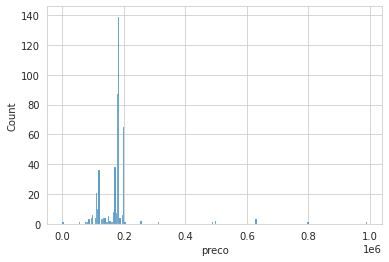

/home/tales/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


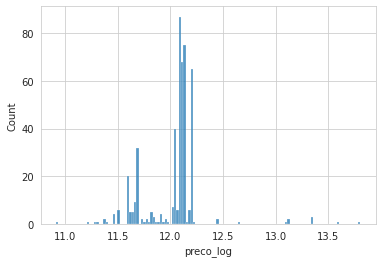

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

x = train.preco
sns.set_style("whitegrid")
sns.histplot(x)
plt.show()

train["preco_log"] = np.log(train.preco)
x = train.preco_log
sns.histplot(x)
plt.show()

#print(train.preco_log)
#print(train.preco)

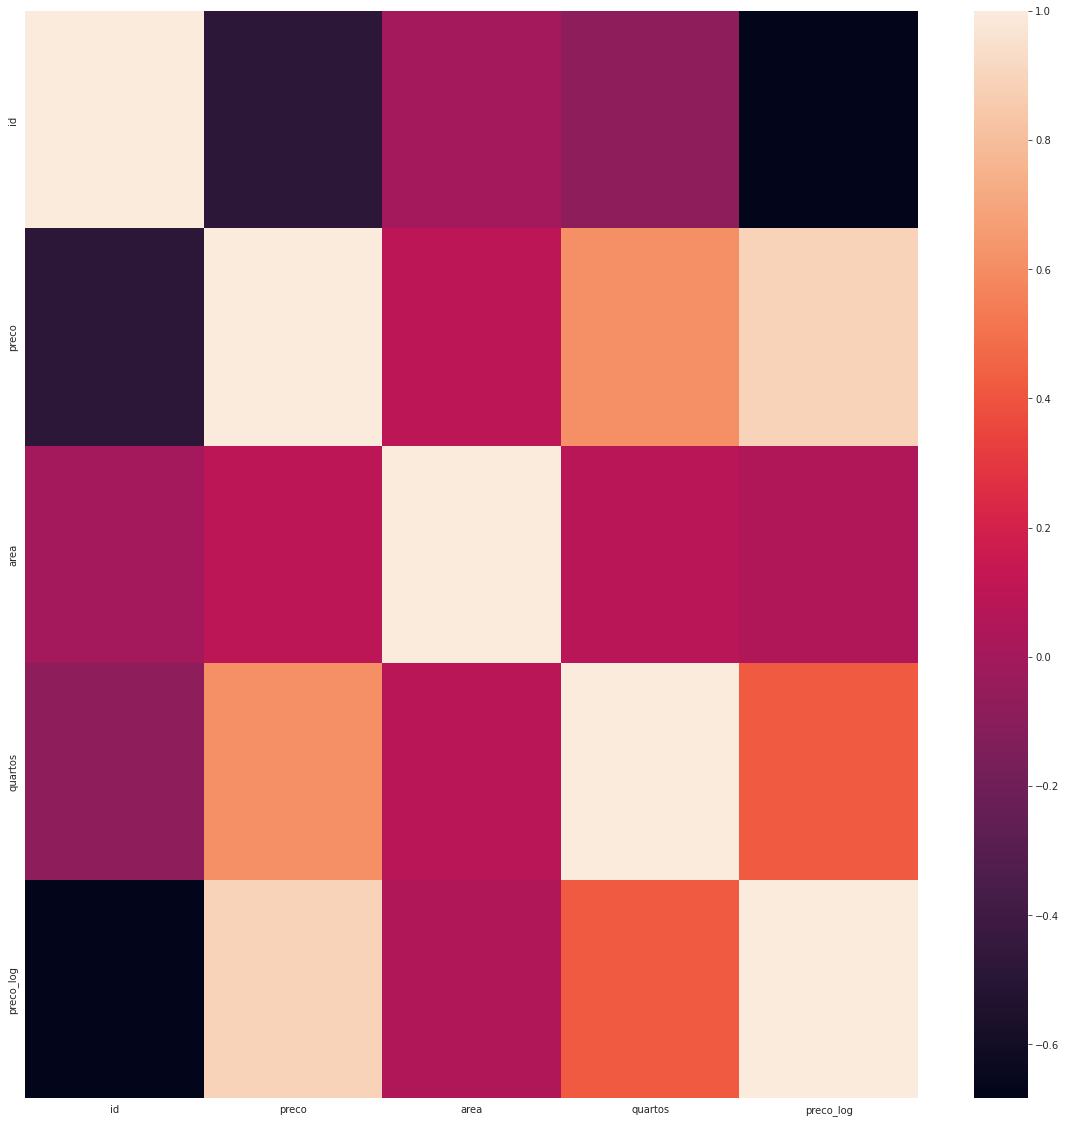

In [11]:
# Correlation in the data set

plt.figure(figsize=(20, 20))
sns.heatmap(train.corr())
plt.savefig("pearsonsmep.png")

<Figure size 720x720 with 0 Axes>

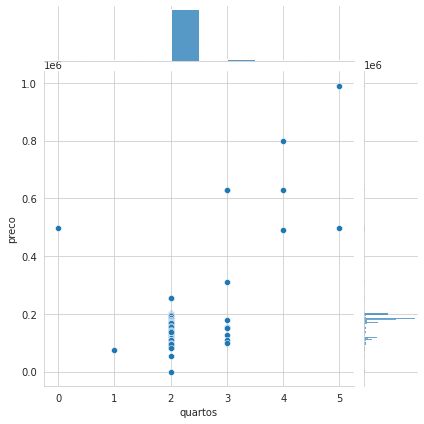

<Figure size 720x720 with 0 Axes>

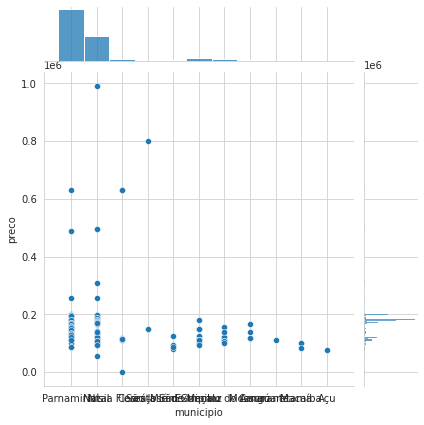

<Figure size 720x720 with 0 Axes>

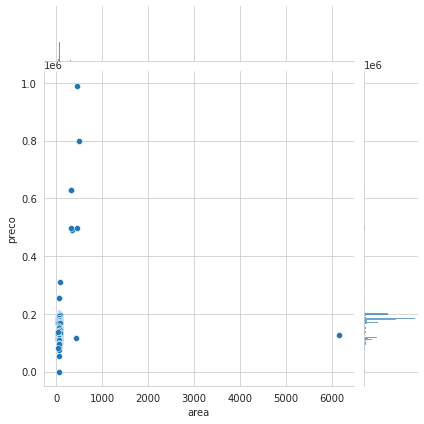

In [12]:
# Look at correlated features with more detail

y = train.preco

features = [
    "quartos",
    #"banheiros",
    "municipio",
    "area"
]

for feature in features:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = train[feature]
    sns.jointplot(x=x, y=y, data=train)

In [13]:
# Convert training and testing data to one hot encoded numeric data

import sklearn

# Create onehotencoder object that relables columns after transforming

from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# Wrapper for one hot encoder to allow labelling of encoded variables
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out
    
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns
        
# Define funtion to encode categorical variables with and rejoin to initial data

def transform(train, df):
    
    # Isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]
    
    # Isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)
    
    # Initialise one hot encoder object specify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    
    # Fit the endcoder to training data
    ohe.fit(train[cat_columns])
    
    # Transform input data
    df_processed = ohe.transform(cat_df)
    
    # Concatenate numeric features from original tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)
    
    return df_processed_full

# Transform training data to numeric form
train_encoded = transform(train, train)

# Transform test data to numeric form
test_encoded = transform(test, test)

# Check data sets are same width minus the two labels in Train
print("Test", test_encoded.shape, "Train", train_encoded.shape)
train_encoded.info()
test_encoded.info()

Test (479, 229) Train (480, 226)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Columns: 226 entries, categoria_<A> to preco_log
dtypes: float64(222), int64(4)
memory usage: 867.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Columns: 229 entries, categoria_<A> to area
dtypes: float64(226), int64(3)
memory usage: 857.1 KB


# Machine Learning

In [14]:
import time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

x_train = train_encoded.drop(columns=["id", "preco", "preco_log"])
Y_train = train_encoded.preco_log


# Initialise Gridsearch CV with 5 fold corssvalidation and root mse for socirn


def model_pipeline(model, param_grid, scoring):
    Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    Tuned_Model.fit(x_train, Y_train)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return Tuned_Model


# Generate results of best run


def plot_mean_scores(Tuned_Model, col, x, y, name):

    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

In [15]:
# Modelling

# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
model = DecisionTreeRegressor(criterion="mse", random_state=0)

Tuned_Model = model_pipeline(model, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

running model


/home/tales/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/tales/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/tales/.local/lib/python3.10/s

/home/tales/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/home/tales/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 95, 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').